## **Data Science Task 5**

**Name:** Satyam Mahesh Salunkhe  
**Batch:** July 5th, 2024

### **Objective:**

1.   Generate meaningful features from existing data.
2.   Use techniques like PCA or feature importance to select the most important
     features.
3.   Optimize feature sets for improved model performance.





In [1]:
# importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# importing our dataset
df = pd.read_csv('/content/drive/MyDrive/Main Flow Services Internships/Data Science with Python Programming/heart.csv')

In [3]:
# checking first five rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
# take a look at the column names
df.columns.values

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype=object)

In [6]:
# checking for null values
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [7]:
# concise summary of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


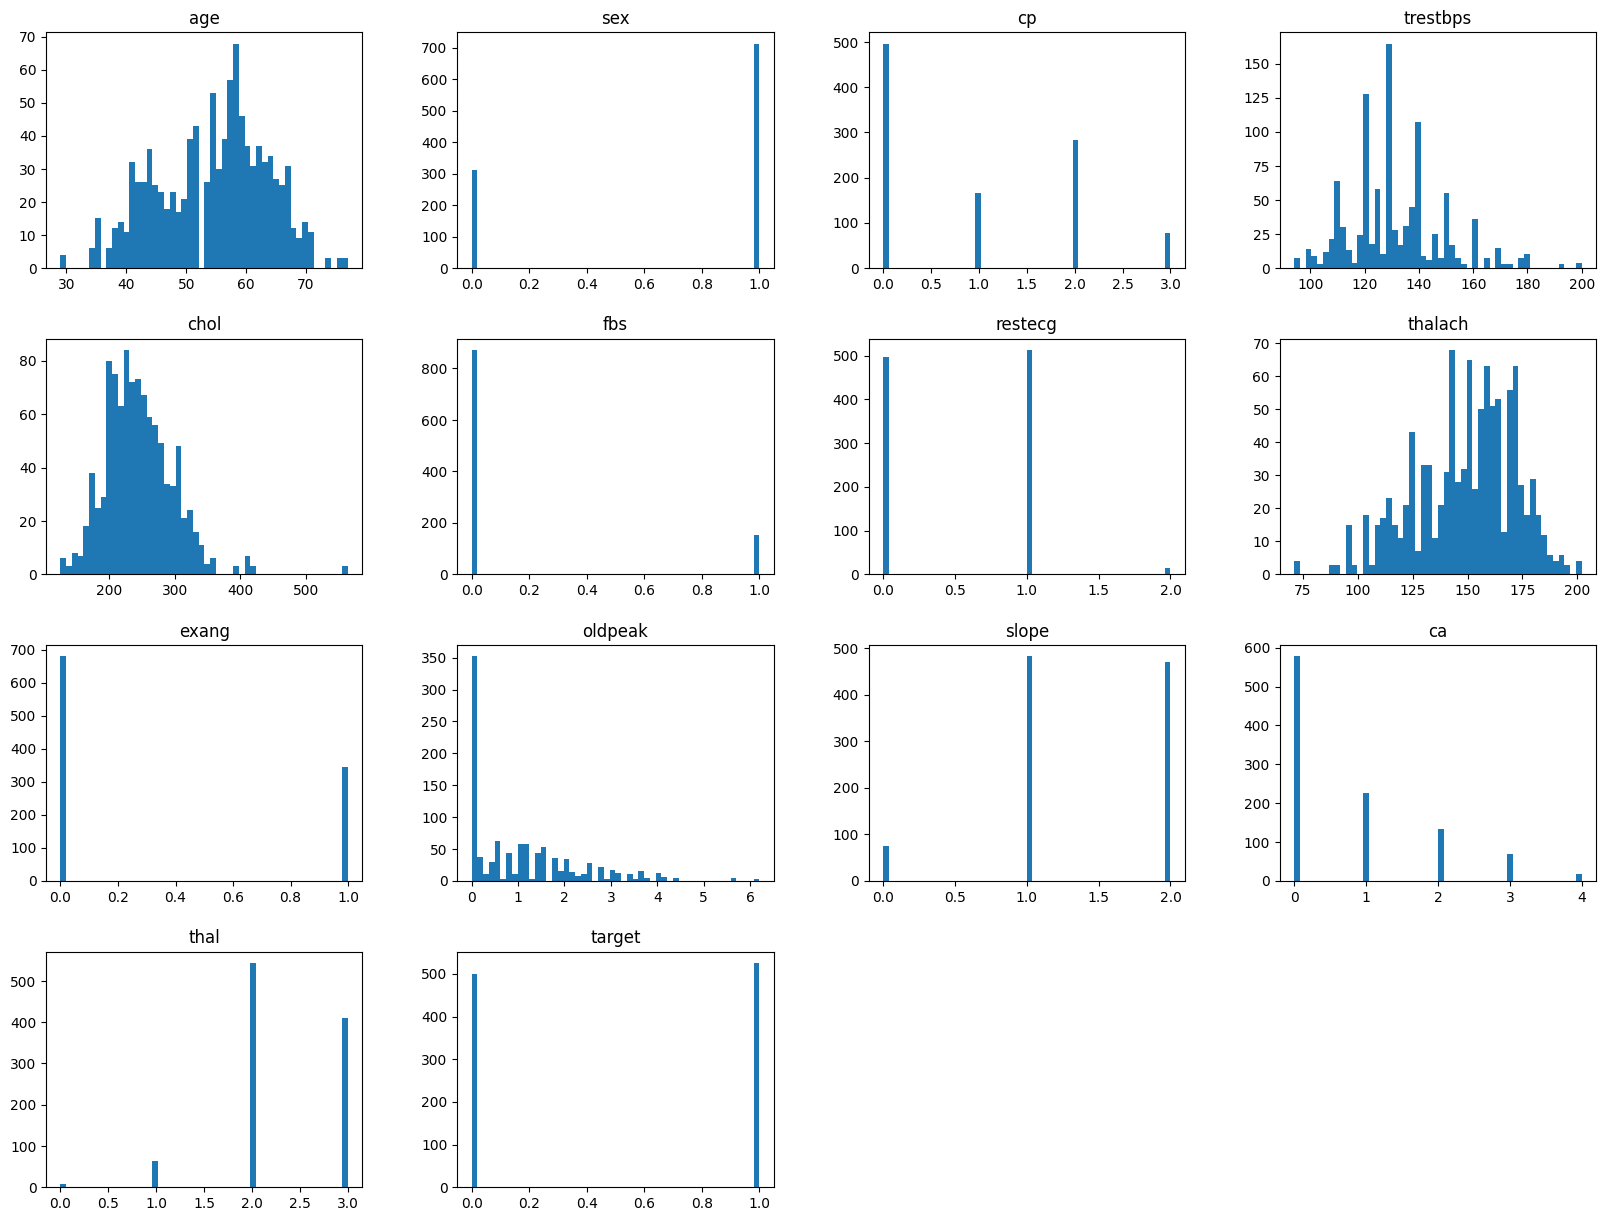

In [8]:
# plotting histogram of all numeric values
df.hist(bins = 50, grid = False, figsize = (20,15));

In [9]:
# Generating descriptive statistics
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
Questions = ["Q1. How many people have heart disease and how many people doesn't have heart disease?",
             "Q2. People of which sex has most disease?",
             "Q3. People of which sex has which type of chest pain most?",
             "Q4. People with which chest pain are most pron to have heart disease?",
             "Q5. People of which age has most disease?",
             "Q6. People of which sex has most coronary artery(ca)?",
             "Q7. People of which age has which type of chest pain most?"]

Questions

["Q1. How many people have heart disease and how many people doesn't have heart disease?",
 'Q2. People of which sex has most disease?',
 'Q3. People of which sex has which type of chest pain most?',
 'Q4. People with which chest pain are most pron to have heart disease?',
 'Q5. People of which age has most disease?',
 'Q6. People of which sex has most coronary artery(ca)?',
 'Q7. People of which age has which type of chest pain most?']

In [11]:
# Let's find answer of our 1st question

# "Q1. How many people have heart disease and how many people doesn't have heart disease?"

# getting the values
df['target'].value_counts()

,count
target,
1,526
0,499


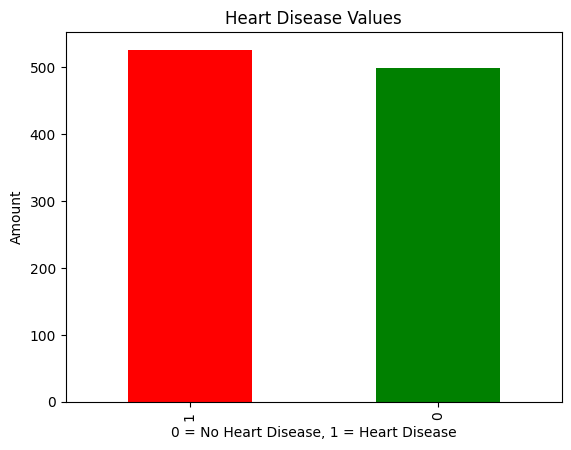

In [12]:
# plotting bar chart
df['target'].value_counts().plot(kind = 'bar', color = ['red', 'green']);
plt.title('Heart Disease Values')
plt.xlabel('0 = No Heart Disease, 1 = Heart Disease')
plt.ylabel('Amount');

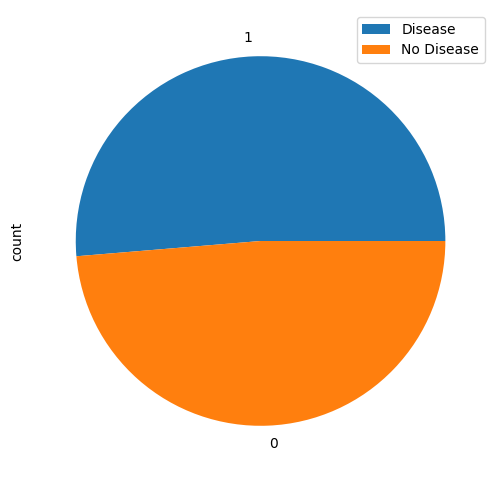

In [13]:
# plotting a pie chart
df.target.value_counts().plot(kind = 'pie', figsize = (8,6))
plt.legend(['Disease', 'No Disease']);

In [14]:
# '0' represent 'Female'

# '1' represent 'Male'

# SEX column part

# '0' represent 'No Disease'

# '1' represent 'Disease'

# # Target column part

# Now let's check how many 'Male' and 'Female' are there in the dataset

df.sex.value_counts()

,count
sex,
1,713
0,312


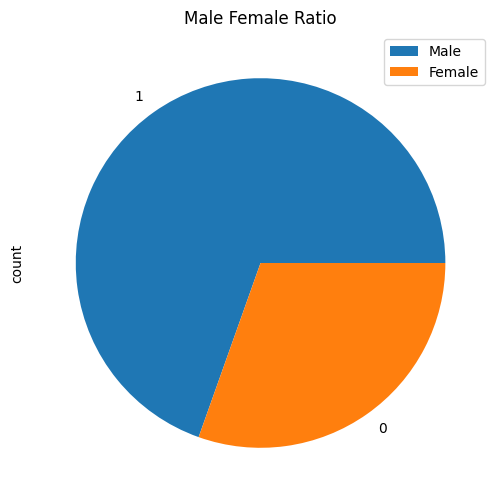

In [15]:
# plotting a pie chart
df.sex.value_counts().plot(kind = 'pie', figsize = (8,6))
plt.legend(['Male', 'Female']);
plt.title('Male Female Ratio');

In [16]:
# Let's find the answer of our 2nd question

# "Q2. People of which sex has most disease?"

pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,86,226
1,413,300


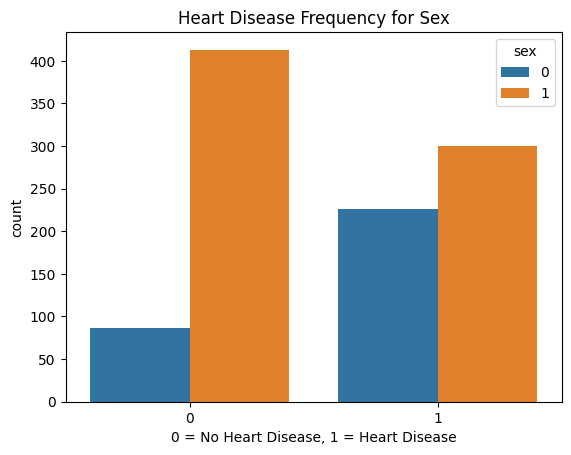

In [17]:
sns.countplot(x = 'target', hue = 'sex', data = df);
plt.title('Heart Disease Frequency for Sex');
plt.xlabel('0 = No Heart Disease, 1 = Heart Disease');

In [18]:
# Number of male is more than double in our dataset than female.

# More than 45% male has heart disease and 75% female has heart disease.

# Let's move to question 3

# "Q3. People of which sex has which type of chest pain most?""

# counting values for different chest pain

df.cp.value_counts()

,count
cp,
0,497
2,284
1,167
3,77


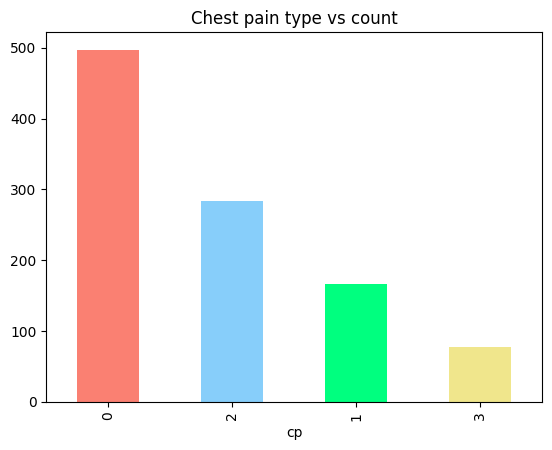

In [19]:
# plotting a bar chart

df.cp.value_counts().plot(kind = 'bar', color = ['salmon', 'lightskyblue', 'springgreen', 'khaki'])
plt.title('Chest pain type vs count');

In [20]:
pd.crosstab(df.sex, df.cp)

cp,0,1,2,3
sex,,,,
0,133,57,109,13
1,364,110,175,64


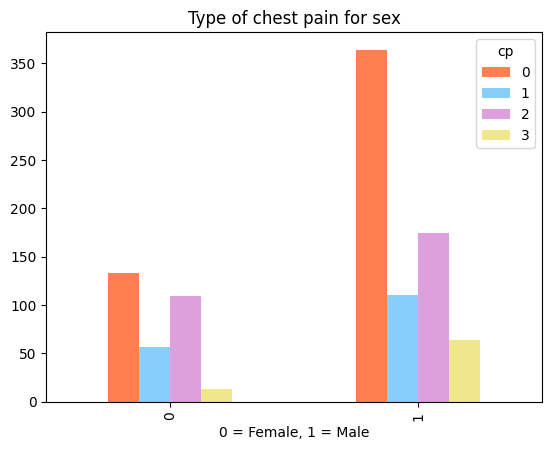

In [21]:
pd.crosstab(df.sex, df.cp).plot(kind = 'bar', color = ['coral', 'lightskyblue', 'plum', 'khaki'])
plt.title('Type of chest pain for sex')
plt.xlabel('0 = Female, 1 = Male');

In [22]:
# Most of male has type 0 chest pain and Least of Male has type 3 pain.

# in case of female type 0 and type 2 percentage is almost same.

# Now question 4!

# "Q4. People with which chest pain are most pron to have heart disease?"

pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


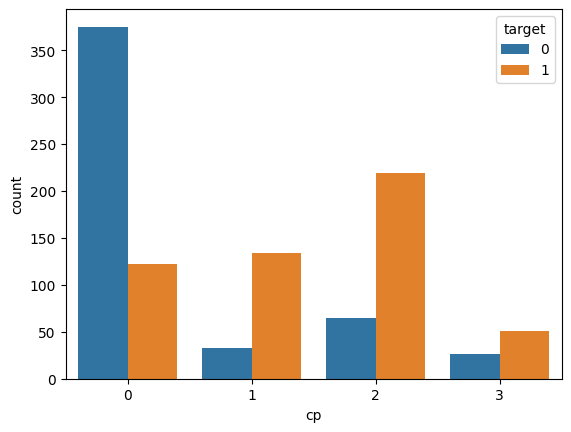

In [23]:
sns.countplot(x = 'cp', hue = 'target', data = df);

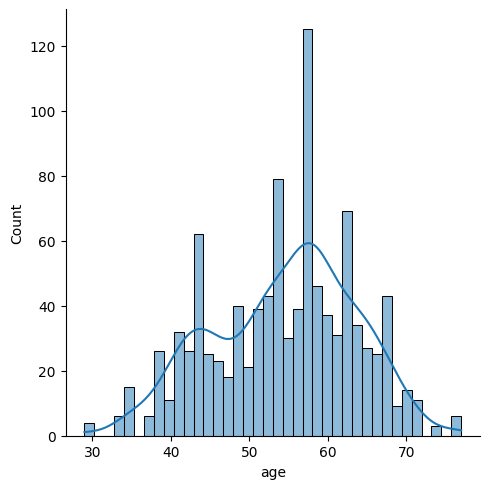

In [24]:
# Most of people who has type 0 chest pain has less chance of heart disease.

# And we see the opposite for other types.

# Now Let's take Look at our age column.

# create a distribution plot with normal distribution curve
sns.displot(x = 'age', data = df, bins = 38, kde = True);

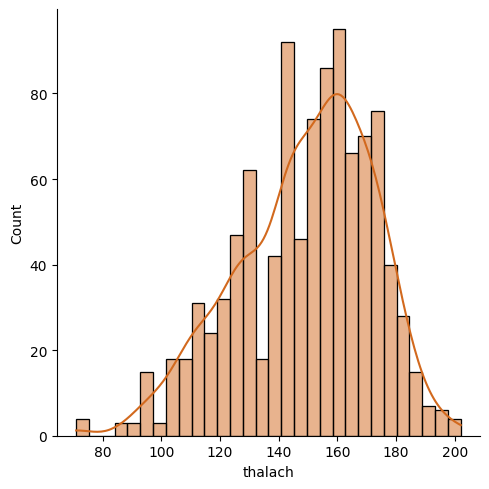

In [25]:
# 58-59 year old people are most in the dataset.

# Let's plot another distribution plot for Maximum heart rate
sns.displot(x = 'thalach', data = df, bins = 30, kde = True, color = 'chocolate');

In [26]:
# From this plot we get a clear overview about Maximum heart rate represented by thalach

In [27]:
# Let's find out answer for Q5

# "Q5. People of which age has most disease?"

pd.crosstab(df.target, df.age)

age,29,34,35,37,38,39,40,41,42,43,...,65,66,67,68,69,70,71,74,76,77
target,,,,,,,,,,,,,,,,,,,,,
0,0,0,7,0,4,4,8,3,4,11,...,15,11,22,6,3,11,0,0,0,3
1,4,6,8,6,8,10,3,29,22,15,...,12,14,9,6,6,3,11,3,3,0


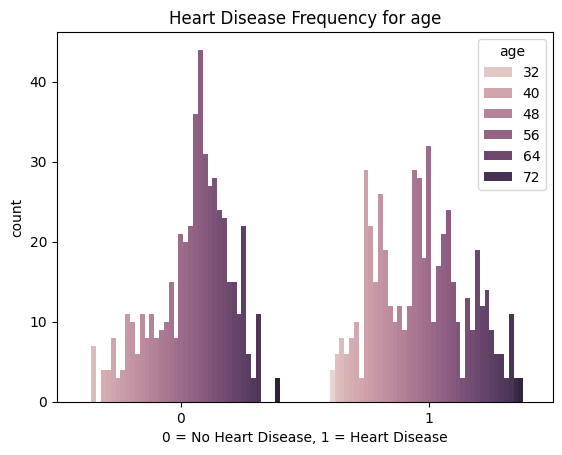

In [28]:
sns.countplot(x = 'target', hue = 'age', data = df);
plt.title('Heart Disease Frequency for age');
plt.xlabel('0 = No Heart Disease, 1 = Heart Disease');

In [29]:
# Let's move to question 6

# "Q6. People of which sex has most coronary artery disease?"

# counting values for different coronary artery

df.ca.value_counts()

,count
ca,
0,578
1,226
2,134
3,69
4,18


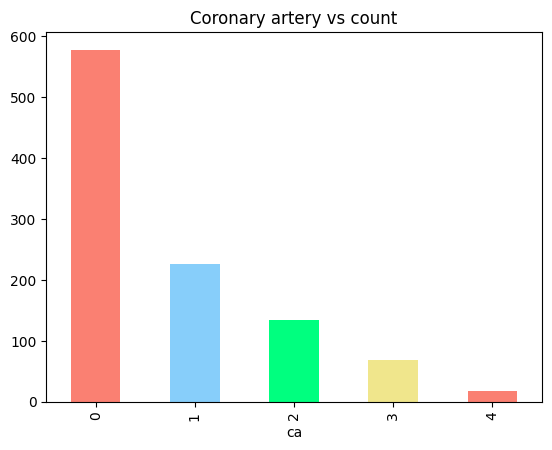

In [30]:
#plotting a bar chart

df.ca.value_counts().plot(kind = 'bar', color = ['salmon', 'lightskyblue', 'springgreen', 'khaki'])
plt.title('Coronary artery vs count');

In [31]:
pd.crosstab(df.sex, df.ca)

ca,0,1,2,3,4
sex,,,,,
0,204,49,45,14,0
1,374,177,89,55,18


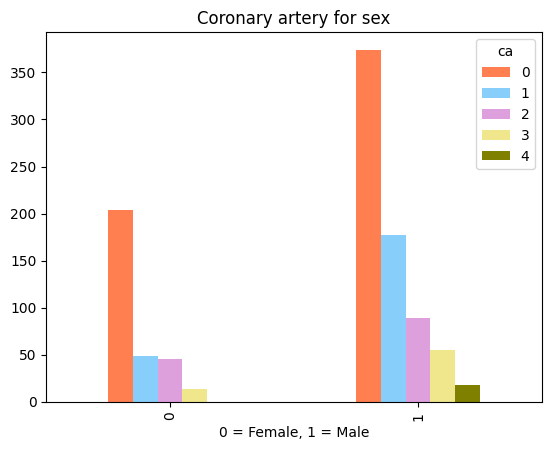

In [32]:
pd.crosstab(df.sex, df.ca).plot(kind = 'bar', color = ['coral', 'lightskyblue', 'plum', 'khaki', 'olive'])
plt.title('Coronary artery for sex')
plt.xlabel('0 = Female, 1 = Male');

In [33]:
# Most of male has type 0 coronary artery and Least of Male has type 4 coronary artery.

# in case of Female type 0 is most and type 1 & type 2 percentage is almost same.

# Now question 7!

# People of which age has which type of chest pain most?

pd.crosstab(df.cp, df.age)

age,29,34,35,37,38,39,40,41,42,43,...,65,66,67,68,69,70,71,74,76,77
cp,,,,,,,,,,,,,,,,,,,,,
0,0,0,11,0,0,4,8,3,10,20,...,14,15,21,3,0,8,4,0,0,3
1,4,3,4,0,0,0,0,20,3,0,...,0,3,0,0,0,3,3,3,0,0
2,0,0,0,6,8,10,0,9,10,6,...,9,4,10,9,3,3,4,0,3,0
3,0,3,0,0,4,0,3,0,3,0,...,4,3,0,0,6,0,0,0,0,0


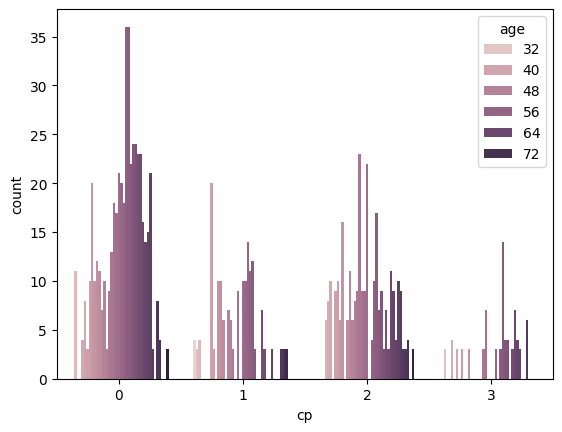

In [34]:
sns.countplot(x = 'cp', hue = 'age', data = df);

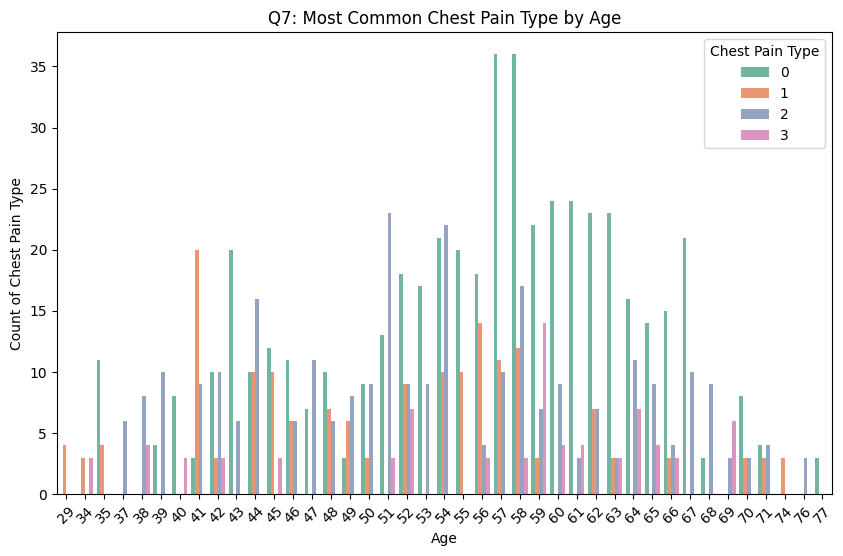

In [35]:
# Plotting the chart
plt.figure(figsize=(10, 6))
sns.countplot(x='age', hue='cp', data=df, palette='Set2')
plt.title('Q7: Most Common Chest Pain Type by Age')
plt.xlabel('Age')
plt.ylabel('Count of Chest Pain Type')
plt.xticks(rotation=45)
plt.legend(title='Chest Pain Type')
plt.show()

In [36]:
# Chest pain type 0 is most in certain age groups

# Chest pain type 1 and 2 are almost same in certain age groups

# Chest pain type 4 is the least in most of the age groups

### **Conclusion**

A detailed understanding of the various health factors that lead to heart disease was made possible by the analysis. Through the examination of variable links and data quality, on tasks identified important risk factors for heart disease. The answers to the questions provided insightful information about preventive measures and possible study topics. The project's overall findings highlight the value of data-driven strategies for improving heart disease early detection and treatment.